<a href="https://colab.research.google.com/github/vajiha110/FMML_IIITH_PROJECTS/blob/main/AIML_Module_4_Lab_1(2)_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron continuation





# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
# Load Sonar dataset
# Note: The dataset will be downloaded automatically if not present in the system
sonar = fetch_openml(name='sonar', version=1, as_frame=False)

# Extract features (X) and target labels (y)
X_sonar, y_sonar = sonar.data, sonar.target

# Map categorical labels to numerical values
label_mapping = {'Rock': 0, 'Mine': 1}
y_sonar = np.array([label_mapping[label] for label in y_sonar])
# Convert features to a Pandas DataFrame if needed
df_sonar = pd.DataFrame(data=X_sonar, columns=sonar.feature_names)

# Display the shape and first few rows of the DataFrame
print("Shape of the DataFrame:", df_sonar.shape)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of the DataFrame: (208, 60)


In [24]:

def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w





In [25]:

def perceptron_algo_plot1(X, Y,eta):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w


array([0.0002, 0.0003, 0.0013])

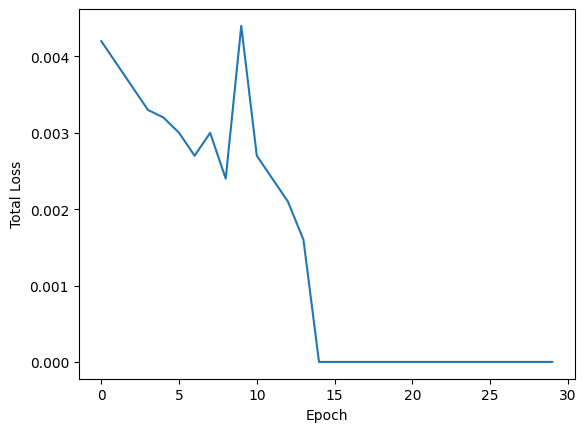

In [29]:
perceptron_algo_plot1(X, y,0.0001)


array([100., 150., 650.])

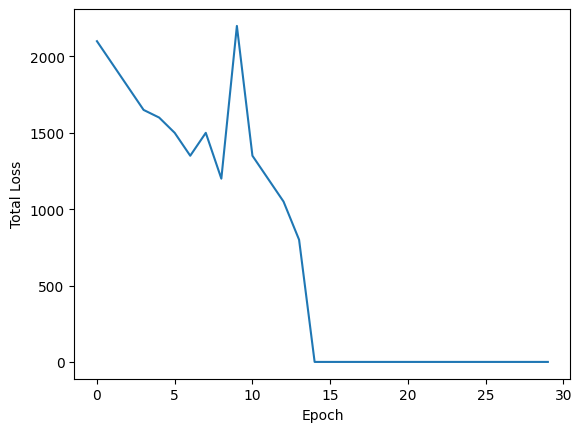

In [30]:
perceptron_algo_plot1(X, y,50)


array([ 200.,  300., 1300.])

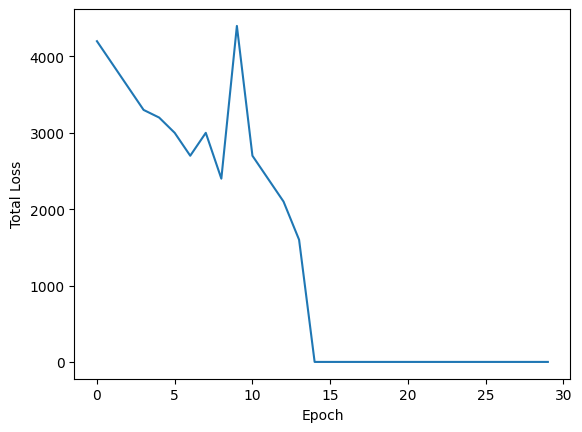

In [31]:
perceptron_algo_plot1(X, y,100)


3.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

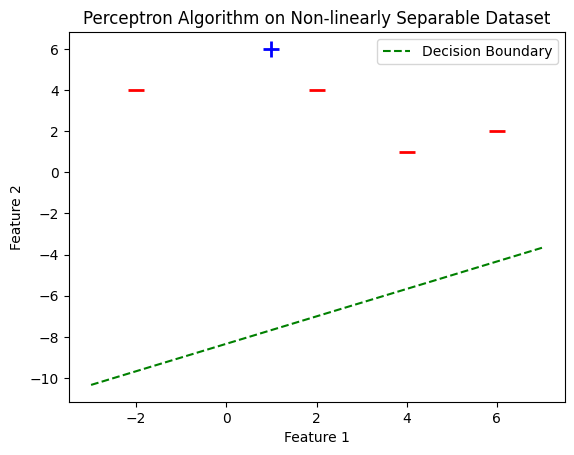

In [35]:
import numpy as np
from matplotlib import pyplot as plt

# Toy dataset that is not linearly separable
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y = np.array([-1, -1, 1, -1, -1])

# Plot the initial dataset
for d, sample in enumerate(X):
    if y[d] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color='red')
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color='blue')

# Apply the perceptron algorithm
def perceptron_algorithm(X, Y, eta=1, epochs=10):
    w = np.zeros(len(X[0]))

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]

    return w

# Apply perceptron algorithm to the non-linearly separable dataset
w_non_linear_separable = perceptron_algorithm(X, y, eta=1, epochs=50)

# Plot the decision boundary
x_decision_boundary = np.linspace(-3, 7, 100)
y_decision_boundary = (-w_non_linear_separable[0] * x_decision_boundary - w_non_linear_separable[2]) / w_non_linear_separable[1]
plt.plot(x_decision_boundary, y_decision_boundary, linestyle='--', color='green', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Algorithm on Non-linearly Separable Dataset')
plt.legend()
plt.show()


In [37]:
def perceptron_algo_plot(X, Y,eta):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

array([-0.0002,  0.0003,  0.0015])

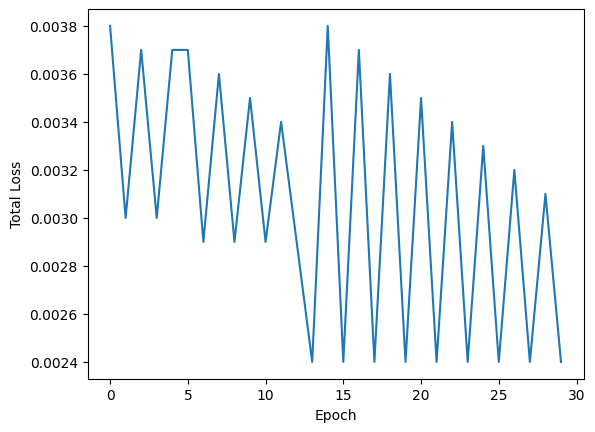

In [38]:
perceptron_algo_plot1(X, y,0.0001)


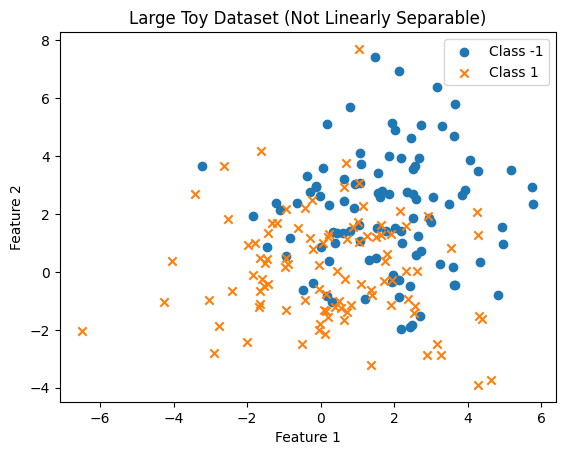

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a larger toy dataset that is not linearly separable
np.random.seed(42)
X_non_linear_large = np.random.randn(200, 2) * 2
X_non_linear_large[:100, :] += 2
y_non_linear_large = np.concatenate([-np.ones(100), np.ones(100)])

# Plot the dataset
plt.scatter(X_non_linear_large[:100, 0], X_non_linear_large[:100, 1], marker='o', label='Class -1')
plt.scatter(X_non_linear_large[100:, 0], X_non_linear_large[100:, 1], marker='x', label='Class 1')
plt.title('Large Toy Dataset (Not Linearly Separable)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


array([-2.17122418,  3.21383501])

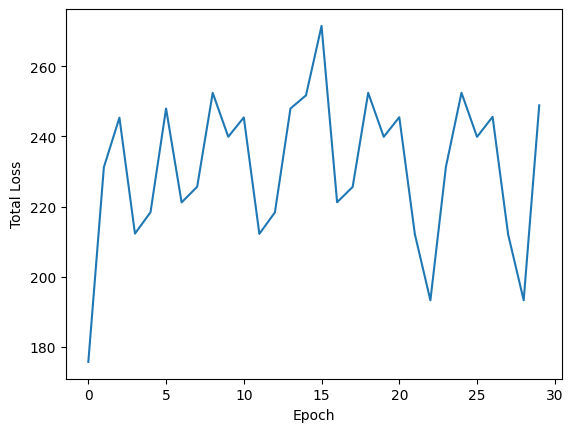

In [53]:
perceptron_algo_plot(X_non_linear_large, y_non_linear_large, eta=1)


If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.